In [1]:
using Symata, NMfE, Plots

### Enter Symata mode

In [2]:
isymata()

L"$$ isymata \!  \left(  \right)  $$"

In [3]:
ClearAll(xi, yi, Y, R, sol, ytilde)
xi = [0, 1//2, 1]
yi = [0, a, 1]
Y(x_) := LagrangePolynomial(xi, yi)
#
# Can be formulated as ytile(x) = F(x) + C1(a) * Ψ(x)
#
# F(x_) := 2*x^2 - x
# C(a_) := -4a
# Ψ(x_) := x^2 - x
#
#Y(x_) := F(x) + C(a)*Ψ(x)
#
R(x_) = Simplify(D(Y(x), x, 2) - 3*x - 4*Y(x))
R(x_) = Simplify(R(x) ./ (a => -C1/4))
SetJ(r, ToString(Simplify(R(x))))

L"$$ \text{\"4.0 + 2.0C1 - 3x - 4x*(-1.0 + 2.0x + C1*(-1 + x))\"} $$"

In [4]:
Julia()

true

### Example 7.13: y'' = 3x + 4y, y(0)=0, y(1)=1
### Residual for Weighted Residual Method using 1 point Lagragian Polynomial

In [5]:
isymata()

In [6]:
Println("\nY(x) = ", Y(x), "\n")
Println("R(x) = ", R(x), "\n")


Y(x) = x*(-1.0 + 2.0x - 4.0a*(-1 + x))

R(x) = 4.0 + 2.0C1 - 3x - 4x*(-1.0 + 2.0x + C1*(-1 + x))



In [7]:
Julia()

true

( Example 7.14 gives: R = -4x^2*(2 + C1) + x*(1 + 4C1) + 2*(2 + C1) )

In [8]:
@assert r == "4.0 + 2.0C1 - 3x - 4x*(-1.0 + 2.0x + C1*(-1 + x))"

In [9]:
y_exact(x) = 7/4*(exp(2x)-exp(-2x))/(exp(2)-exp(-2))-3/4*x

y_exact (generic function with 1 method)

In [10]:
ytildes_1pt = [
    (x) -> ytilde_1pt_collocation(x) - y_exact(x),
    (x) -> ytilde_1pt_subdomain(x) - y_exact(x),
    (x) -> ytilde_1pt_leastsquares(x) - y_exact(x),
    (x) -> ytilde_1pt_galerkin(x) - y_exact(x)
];

ytildes_2pt = [
    (x) -> ytilde_2pt_collocation(x) - y_exact(x),
    (x) -> ytilde_2pt_subdomain(x) - y_exact(x),
    (x) -> ytilde_2pt_leastsquares(x) - y_exact(x),
    (x) -> ytilde_2pt_galerkin(x) - y_exact(x)
];

In [11]:
labels_1pt = ["ytilde_1pt_collocation", "ytilde_1pt_subdomain",
"ytilde_1pt_leastsquares", "ytilde_1pt_galerkin"];

In [12]:
p1 = plot()
for (i, f) in enumerate(ytildes_1pt)
    lab = labels_1pt[i]
    if i == 1
      p1 = plot(f, 0, 1, label=lab, ylabel="ÿ - y")
    else
      plot!(p1, f, 0, 1, label=lab)
    end
end

LoadError: LoadError: UndefVarError: ytilde_1pt_collocation not defined
while loading In[12], in expression starting on line 2

In [13]:
labels_2pt = ["ytilde_2pt_collocation", "ytilde_2pt_subdomain",
"ytilde_2pt_leastsquares", "ytilde_2pt_galerkin"];

In [14]:
p2 = plot()
for (i, f) in enumerate(ytildes_2pt)
    lab = labels_2pt[i]
    if i == 1
      p2 = plot(f, 0, 1, label=lab, xlabel="x", ylabel="ÿ - y")
    else
      plot!(p2, f, 0, 1, label=lab)
    end
end

LoadError: LoadError: UndefVarError: ytilde_2pt_collocation not defined
while loading In[14], in expression starting on line 2


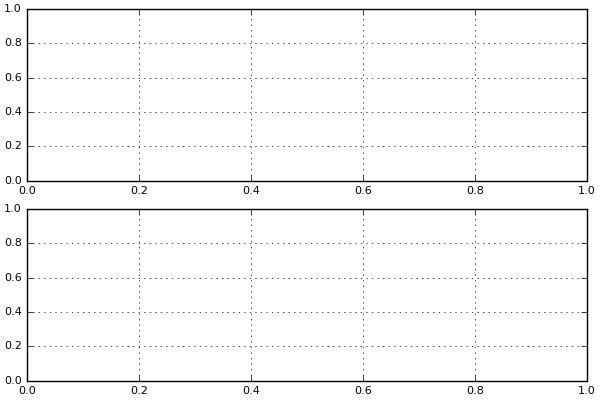

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [15]:
plot(p1, p2, layout=(2, 1), link=:both, leg=true)